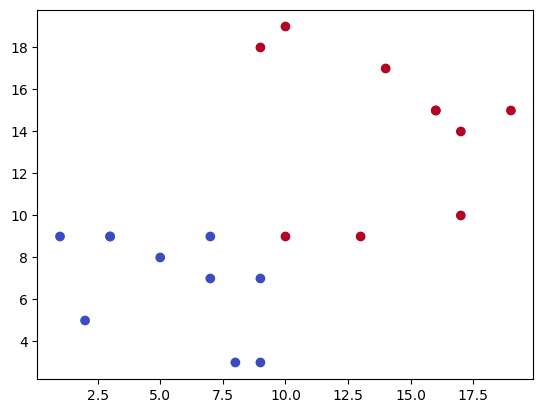

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
noise = 5*np.random.randn(20)

x1 = np.append(np.random.randint(1,10,10), np.random.randint(9,20,10))
x2 = np.append(np.random.randint(1,10,10), np.random.randint(9,20,10))
y = np.append(np.zeros(10), np.ones(10))

x = np.column_stack((x1,x2))
plt.scatter(x1,x2, c =y, cmap='coolwarm')
plt.show()

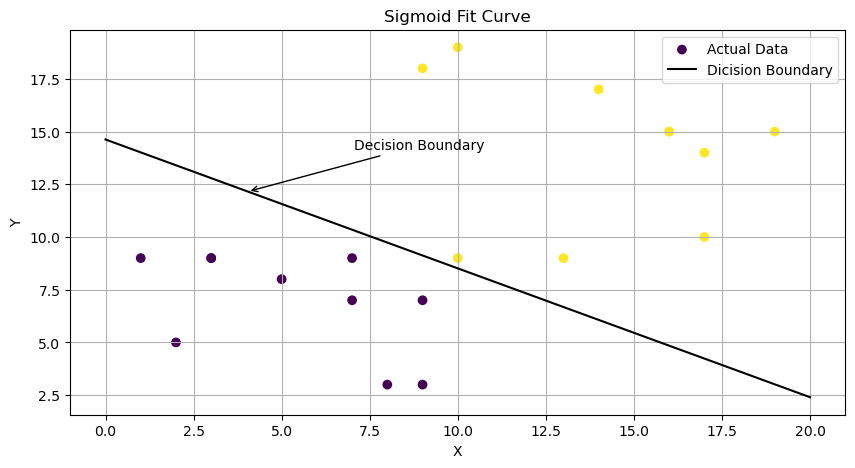

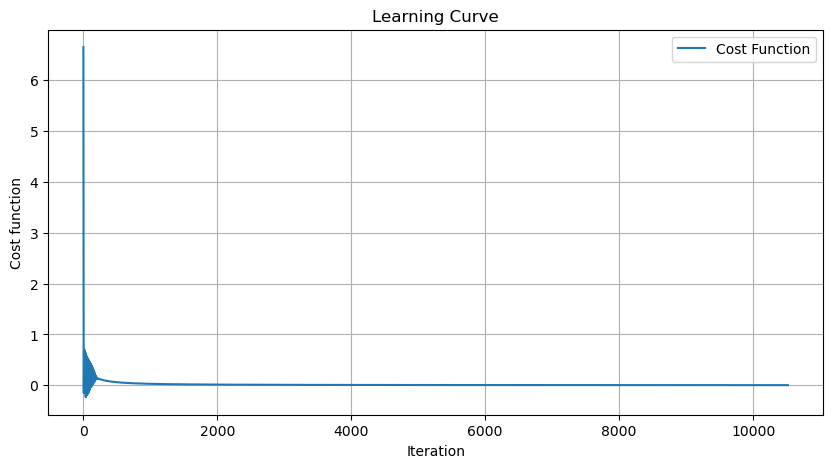

In [11]:
def cost_function(w,b):
    return (y*np.log(segmoid(x,w,b))-(1-y)*np.log(1-segmoid(x,w,b))).mean()

def segmoid(x,w,b):
    return 1/(1+np.exp(-1*(np.dot(x,w)+b)))

def gradient_decent(w,b):
    w_temp = w
    b_temp = b

    for i,_ in enumerate(w):
        w[i] = w_temp[i] - alpha*((segmoid(x,w_temp,b)-y)*x.T[i]).mean()  
    b = b_temp - alpha*(segmoid(x,w_temp,b)-y).mean()

    return w,b


m,n = x.shape
alpha = 0.1
w = np.ones(n)
b = 1

cost = np.array([cost_function(w,b)])
iterations = np.array([1])

w,b = gradient_decent(w,b)
cost = np.append(cost,cost_function(w,b))
iteration = 2
iterations = np.append(iterations,iteration)

while (abs(cost[-2]-cost[-1])>0.0000002): 
    w,b = gradient_decent(w,b)
    cost = np.append(cost,cost_function(w,b))
    iteration += 1
    iterations = np.append(iterations,iteration)

    
xlabel = np.linspace(0,20,100)
yboundary = (-b/w[0])-(w[1]*xlabel/w[0])
plt.figure(figsize=(10,5))
plt.scatter(x1,x2, label = 'Actual Data', c = y) # Original data
plt.plot(xlabel,yboundary, label = 'Dicision Boundary', c='k') # Decision boundary

plt.annotate('Decision Boundary', xy=(xlabel[20], yboundary[20]), xytext=(xlabel[20]+3, yboundary[20]+2), # Predefined by help of ChatGPT
             arrowprops=dict(arrowstyle='->', color='k'))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid Fit Curve')
plt.legend()
plt.grid()
plt.show()



plt.figure(figsize=(10,5))
plt.plot(iterations,cost, label = 'Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


In [4]:
from sklearn.linear_model import LogisticRegression
model_ = LogisticRegression()
model_.fit(x,y)

print(f'sklearn model params ==> w = {model_.coef_}, b = {model_.intercept_[0]} with cost of {cost_function(model_.coef_[0],model_.intercept_[0]):.3f}')
print(f'Gradient Decent parm ==> w = {w}, b = {b} with cost of {cost[-1]:.3f} // {iterations[-1]} iterations ')

sklearn model params ==> w = [[0.89345165 0.63829121]], b = -14.013601244543784 with cost of -0.002
Gradient Decent parm ==> w = [0.65920002 0.41443328], b = -9.859187355200593 with cost of 0.008 // 36436 iterations 
